## Problem Statment

Task 1--> Prepare a complete data analysis report on the given data.
Tsk 2 -->-Create a predictive model with implementation of different classifier           
liver patient diseases dataset to predict liver diseas.
estask a-:- Create an analysis to show on what basis you have designedouru          r
model.

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
data=pd.read_csv('liver_patient.csv',names=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_Globulin_Ratio','Target'])

## Basic Checks

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Insight-->
1. Min age is 4 and max is 90 from given datas info 90's some people are taken as 90 age.
2. Target values are in 1 and 2 formate in feature we convert 2 into 0.
3. Direct_Bilirubn is nearly equal to zoro

In [7]:
data.value_counts('Target')

Target
1    416
2    167
Name: count, dtype: int64

In [8]:
data.Target.unique()

array([1, 2], dtype=int64)

## Domain Analysis

1. Age: Older individuals are more likely to develop liver disease due to age-related    liver function decline.
2. Gender: Gender contain male and female category only.
3. Total Bilirubin: Elevated levels of total bilirubin indicate liver dysfunction,       such as jaundice, bile duct obstruction, or liver disease. High values suggest        liver damage.
4. Direct Bilirubin: Elevated direct bilirubin suggests liver or bile duct issues,       such as cholestasis, where the liver is unable to process bilirubin properly.
5. Alkaline Phosphatase (ALP): High ALP levels indicate liver or bile duct problems.     It can signal conditions like cholestasis, liver disease, or bile duct                obstructions.
6. Alanine Aminotransferase (ALT): ALT is specific to the liver. Elevated levels are     a key marker of liver inflammation or damage, commonly seen in hepatitis or fatty     liver disease.
7. Aspartate Aminotransferase (AST): AST also indicates liver injury, but it is less     liver-specific. It can be elevated due to liver, heart, or muscle injury. The         ALT/AST ratio helps diagnose liver disease type.
8. Total Proteins: The liver produces many proteins, so low total protein levels         indicate poor liver function, such as in cirrhosis or liver failure.
9. Albumin: Low albumin levels are a sign of liver dysfunction or cirrhosis, as the      liver cannot produce enough albumin in these conditions.
10. Albumin/Globulin Ratio (A/G Ratio): A low A/G ratio suggests liver disease,          especially cirrhosis, where the liver fails to produce adequate albumin and           globulin levels change.
11. Target: The target variable likely indicates the presence (1) or absence (0) of      liver disease, making it the primary outcome variable in the analysis.

## EDA

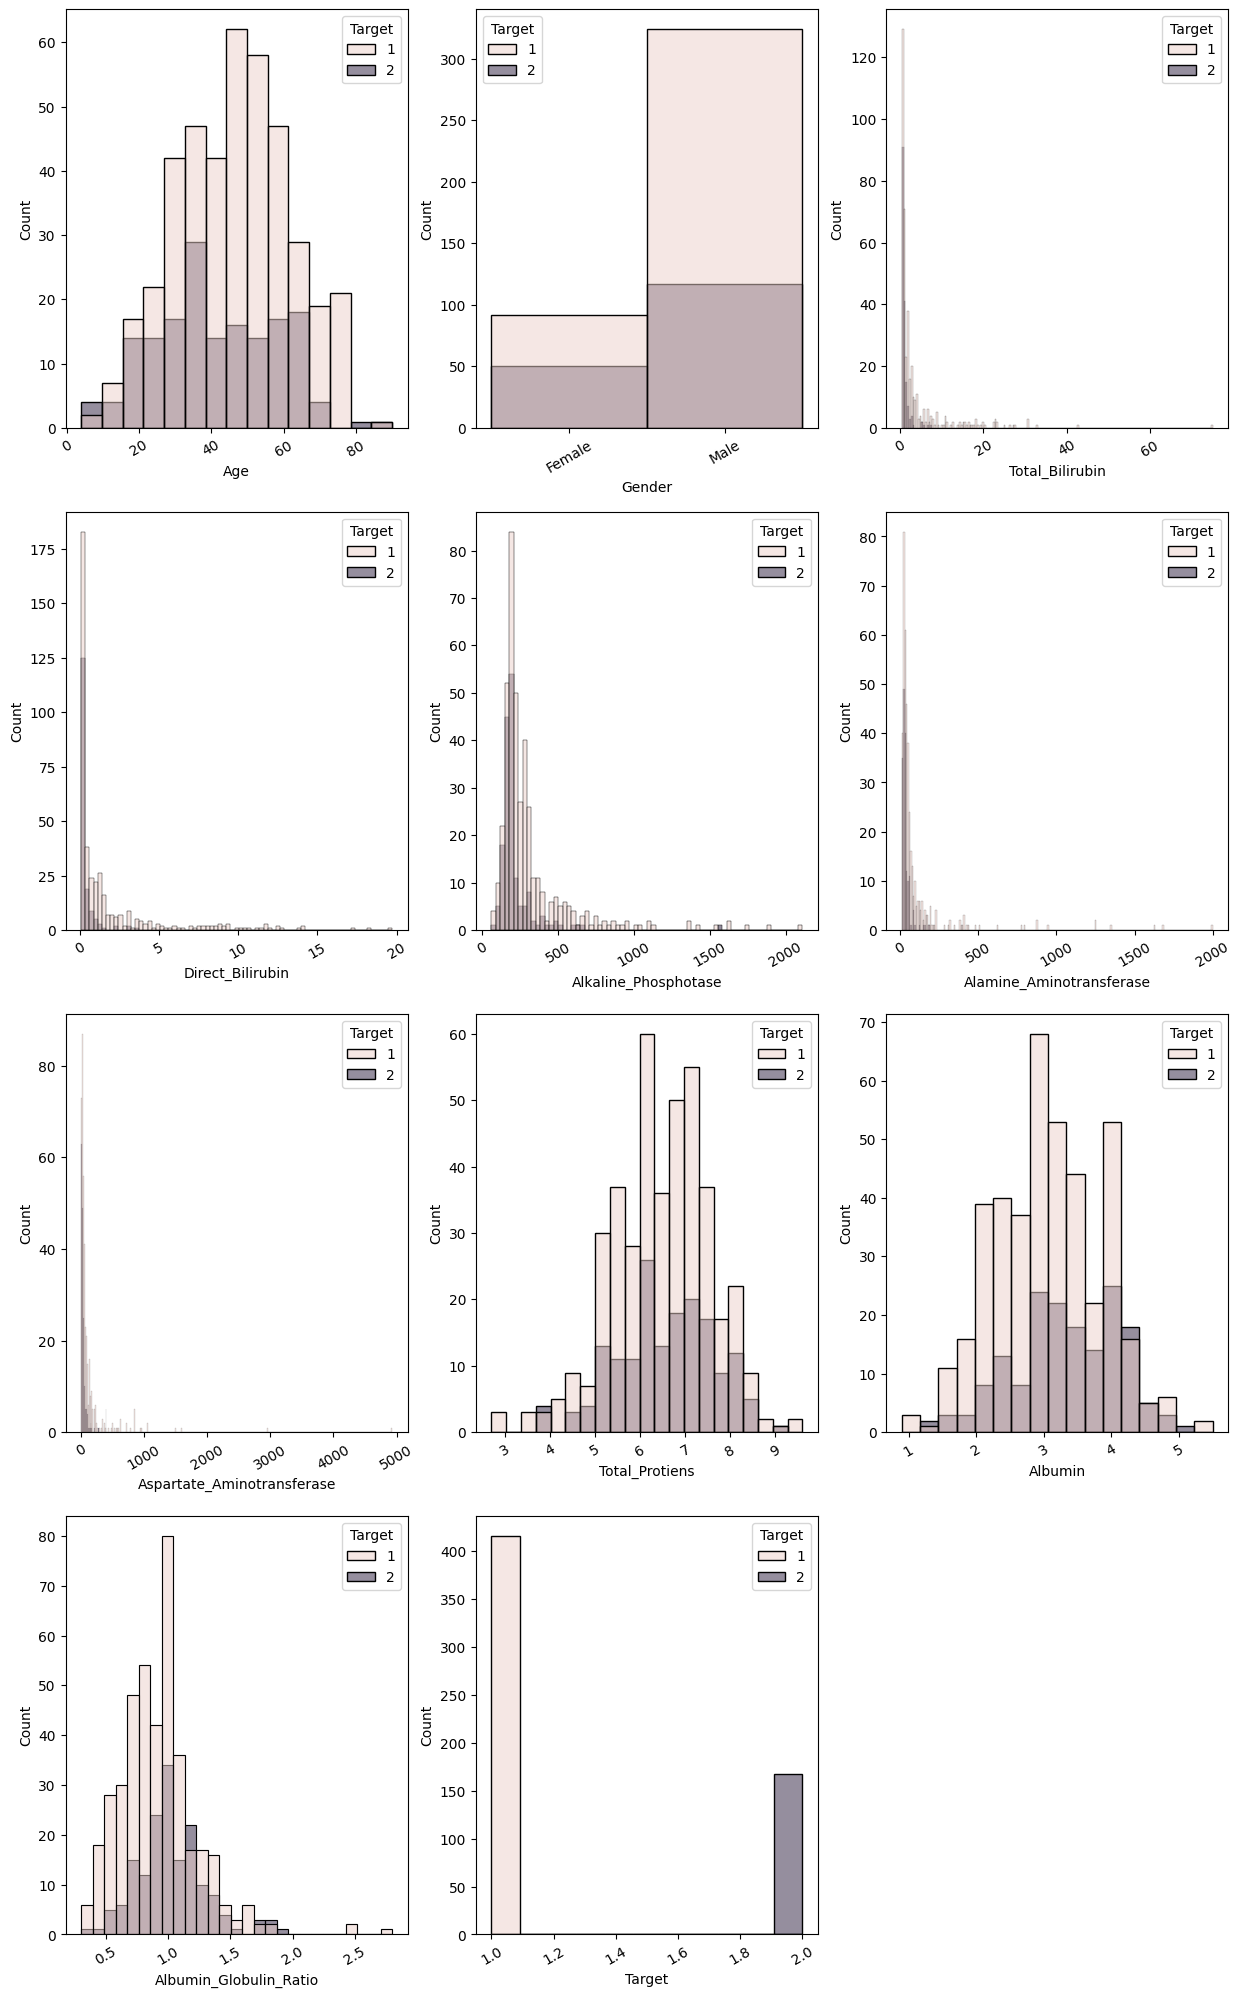

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in data:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(x=data[column],hue=data['Target'])
    plt.xlabel(column)
    plt.xticks(rotation=30)
    plotnumber+=1
plt.show()
plt.tight_layout()

Insights-->
1. From above graph you can see most of the data is positively skewed.
2. some of the data is fairly normal.

In [10]:
# Also you can use sweetviz for better EDA

In [11]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Insights-->
1. Huge difference in gender.
2. Target variable is imbalenced.

<Axes: xlabel='Direct_Bilirubin', ylabel='Total_Bilirubin'>

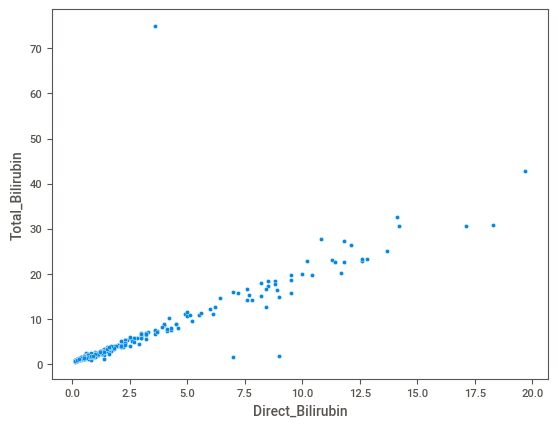

In [12]:
sns.scatterplot(x='Direct_Bilirubin',y='Total_Bilirubin',data=data)

<Axes: xlabel='Albumin', ylabel='Total_Protiens'>

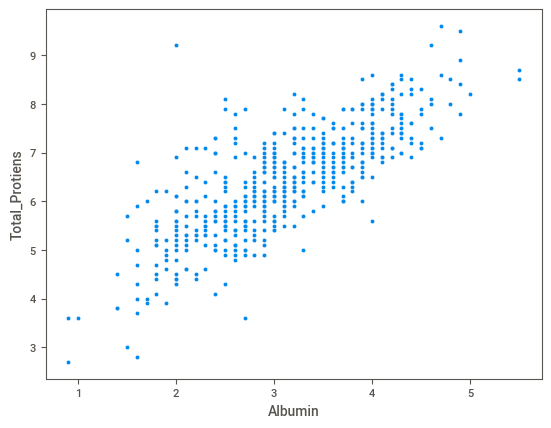

In [13]:
sns.scatterplot(x='Albumin',y='Total_Protiens',data=data)

<Axes: xlabel='Albumin', ylabel='Albumin_Globulin_Ratio'>

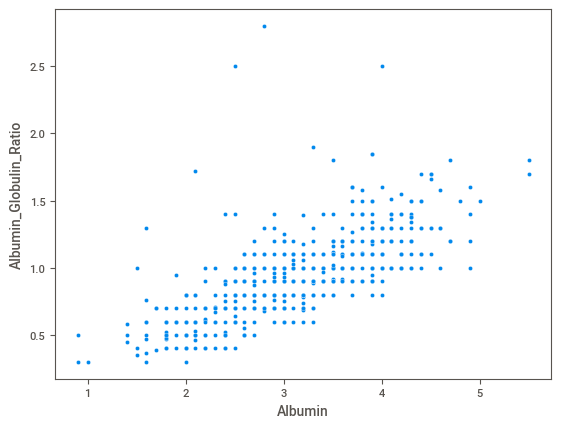

In [14]:
sns.scatterplot(x='Albumin',y='Albumin_Globulin_Ratio',data=data)

<Axes: ylabel='count'>

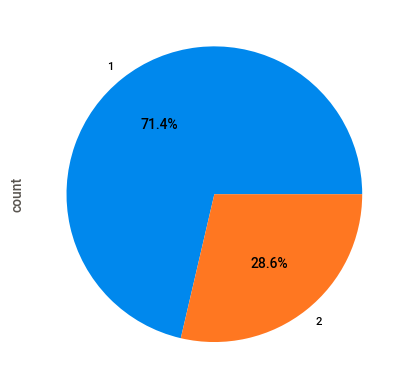

In [15]:
data.Target.value_counts().plot(kind='pie',autopct='%1.1f%%')

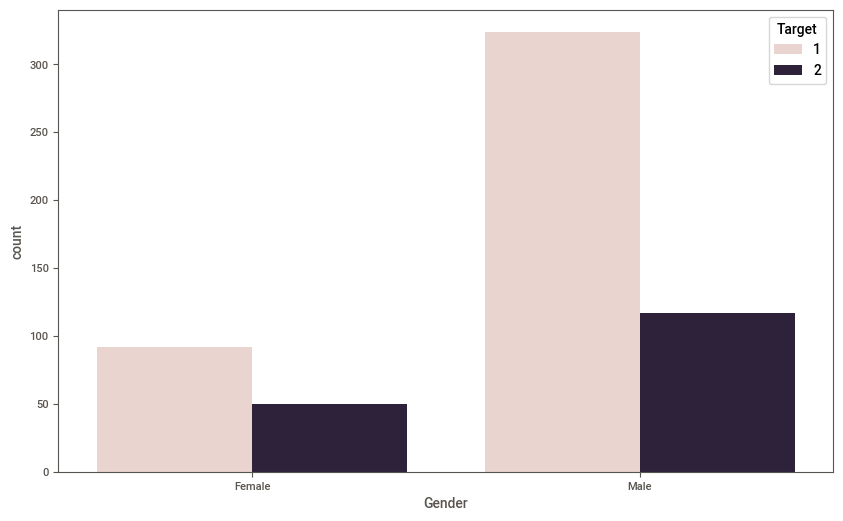

In [16]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Gender',data=data,hue='Target')

Insights-->
1. from above graph we conclude male have more chance to getting liver disease as compared to female.

<Axes: xlabel='Age', ylabel='Count'>

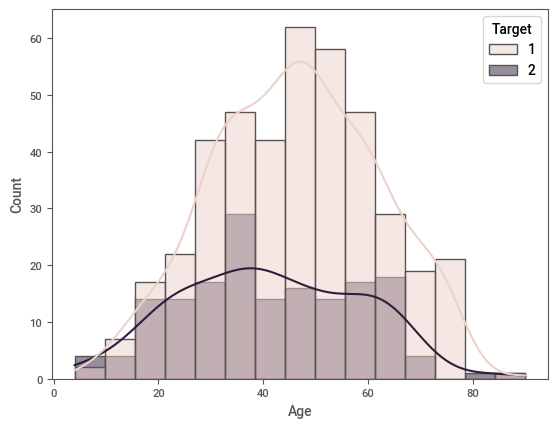

In [17]:
sns.histplot(x='Age',kde=True,hue='Target',data=data)

Insights-->
1. We can see above 40 age people have greater than 50% chance of liver disease problem.

Text(0, 0.5, 'people count')

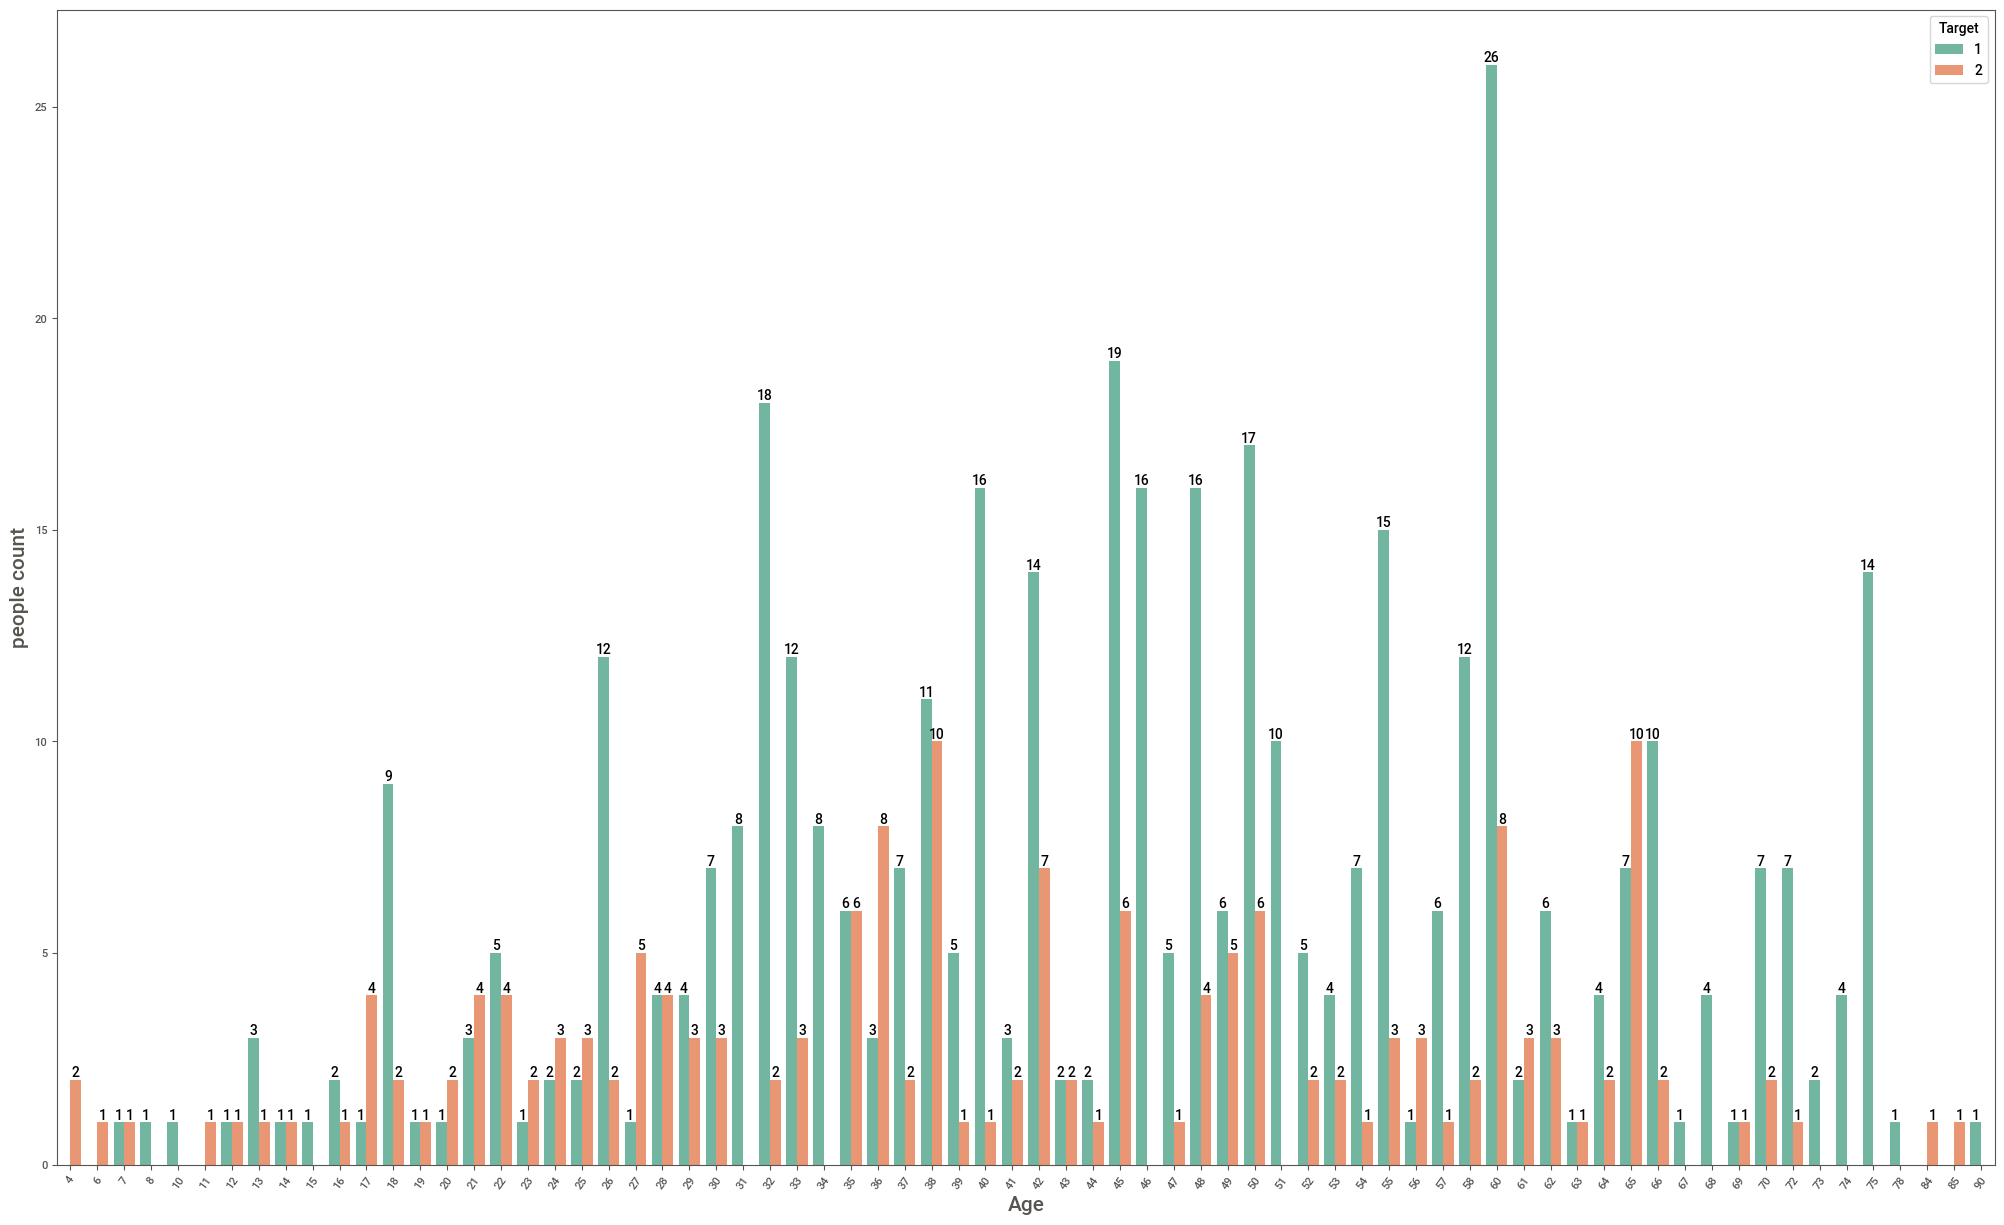

In [18]:
plt.figure(figsize=(25,15),facecolor='white')
ax=sns.countplot(x=data.Age,data=data,hue=data.Target,palette='Set2')
plt.xticks(rotation=54)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Age',fontsize=15)
plt.ylabel('people count',fontsize=15)

Text(0, 0.5, 'people count')

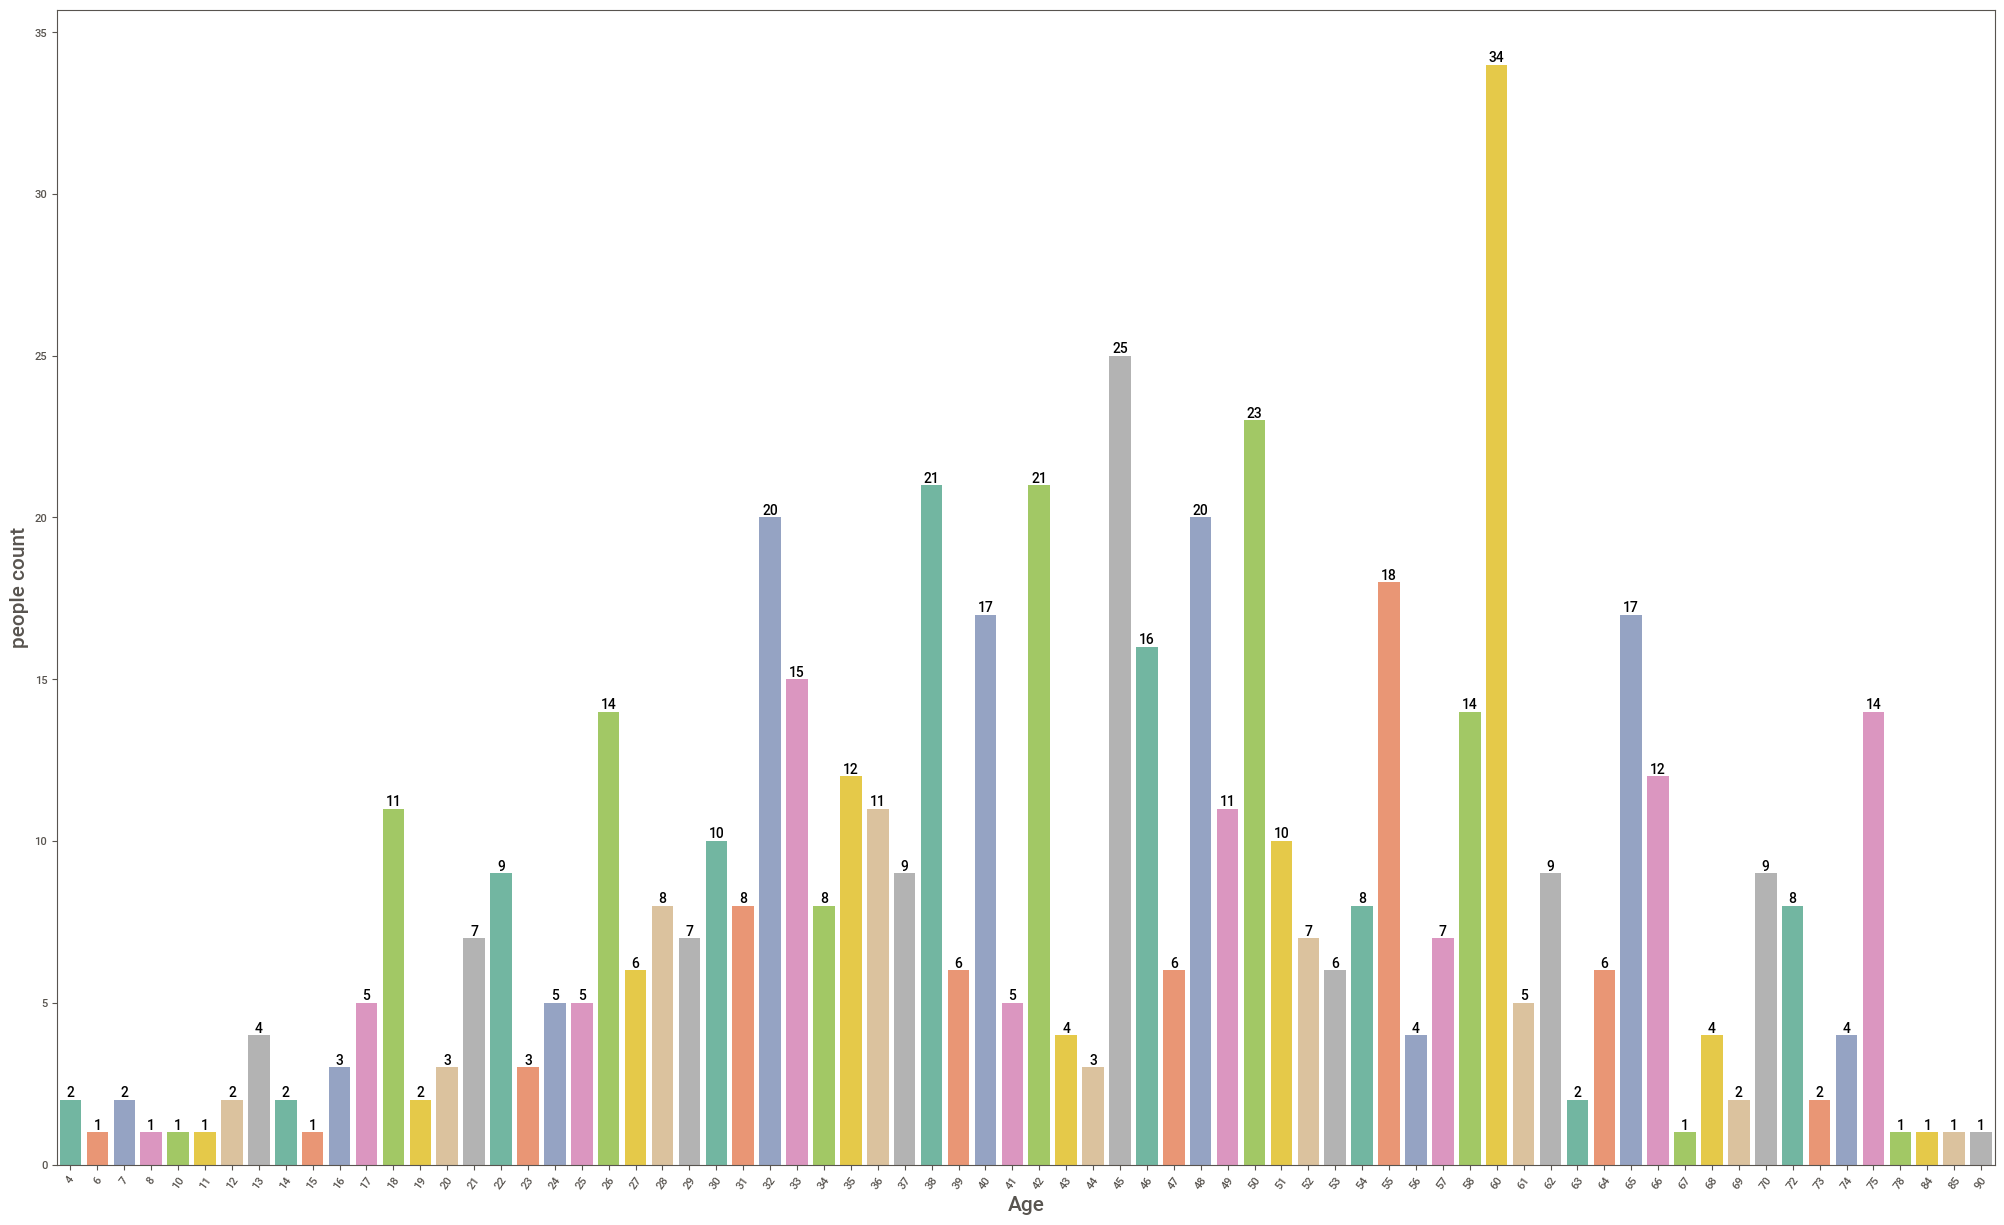

In [19]:
plt.figure(figsize=(25,15),facecolor='white')
ax=sns.countplot(x=data.Age,data=data,palette='Set2')
plt.xticks(rotation=54)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Age',fontsize=15)
plt.ylabel('people count',fontsize=15)

Insight-->
1. From above graph 60 age people are more counted in our data.

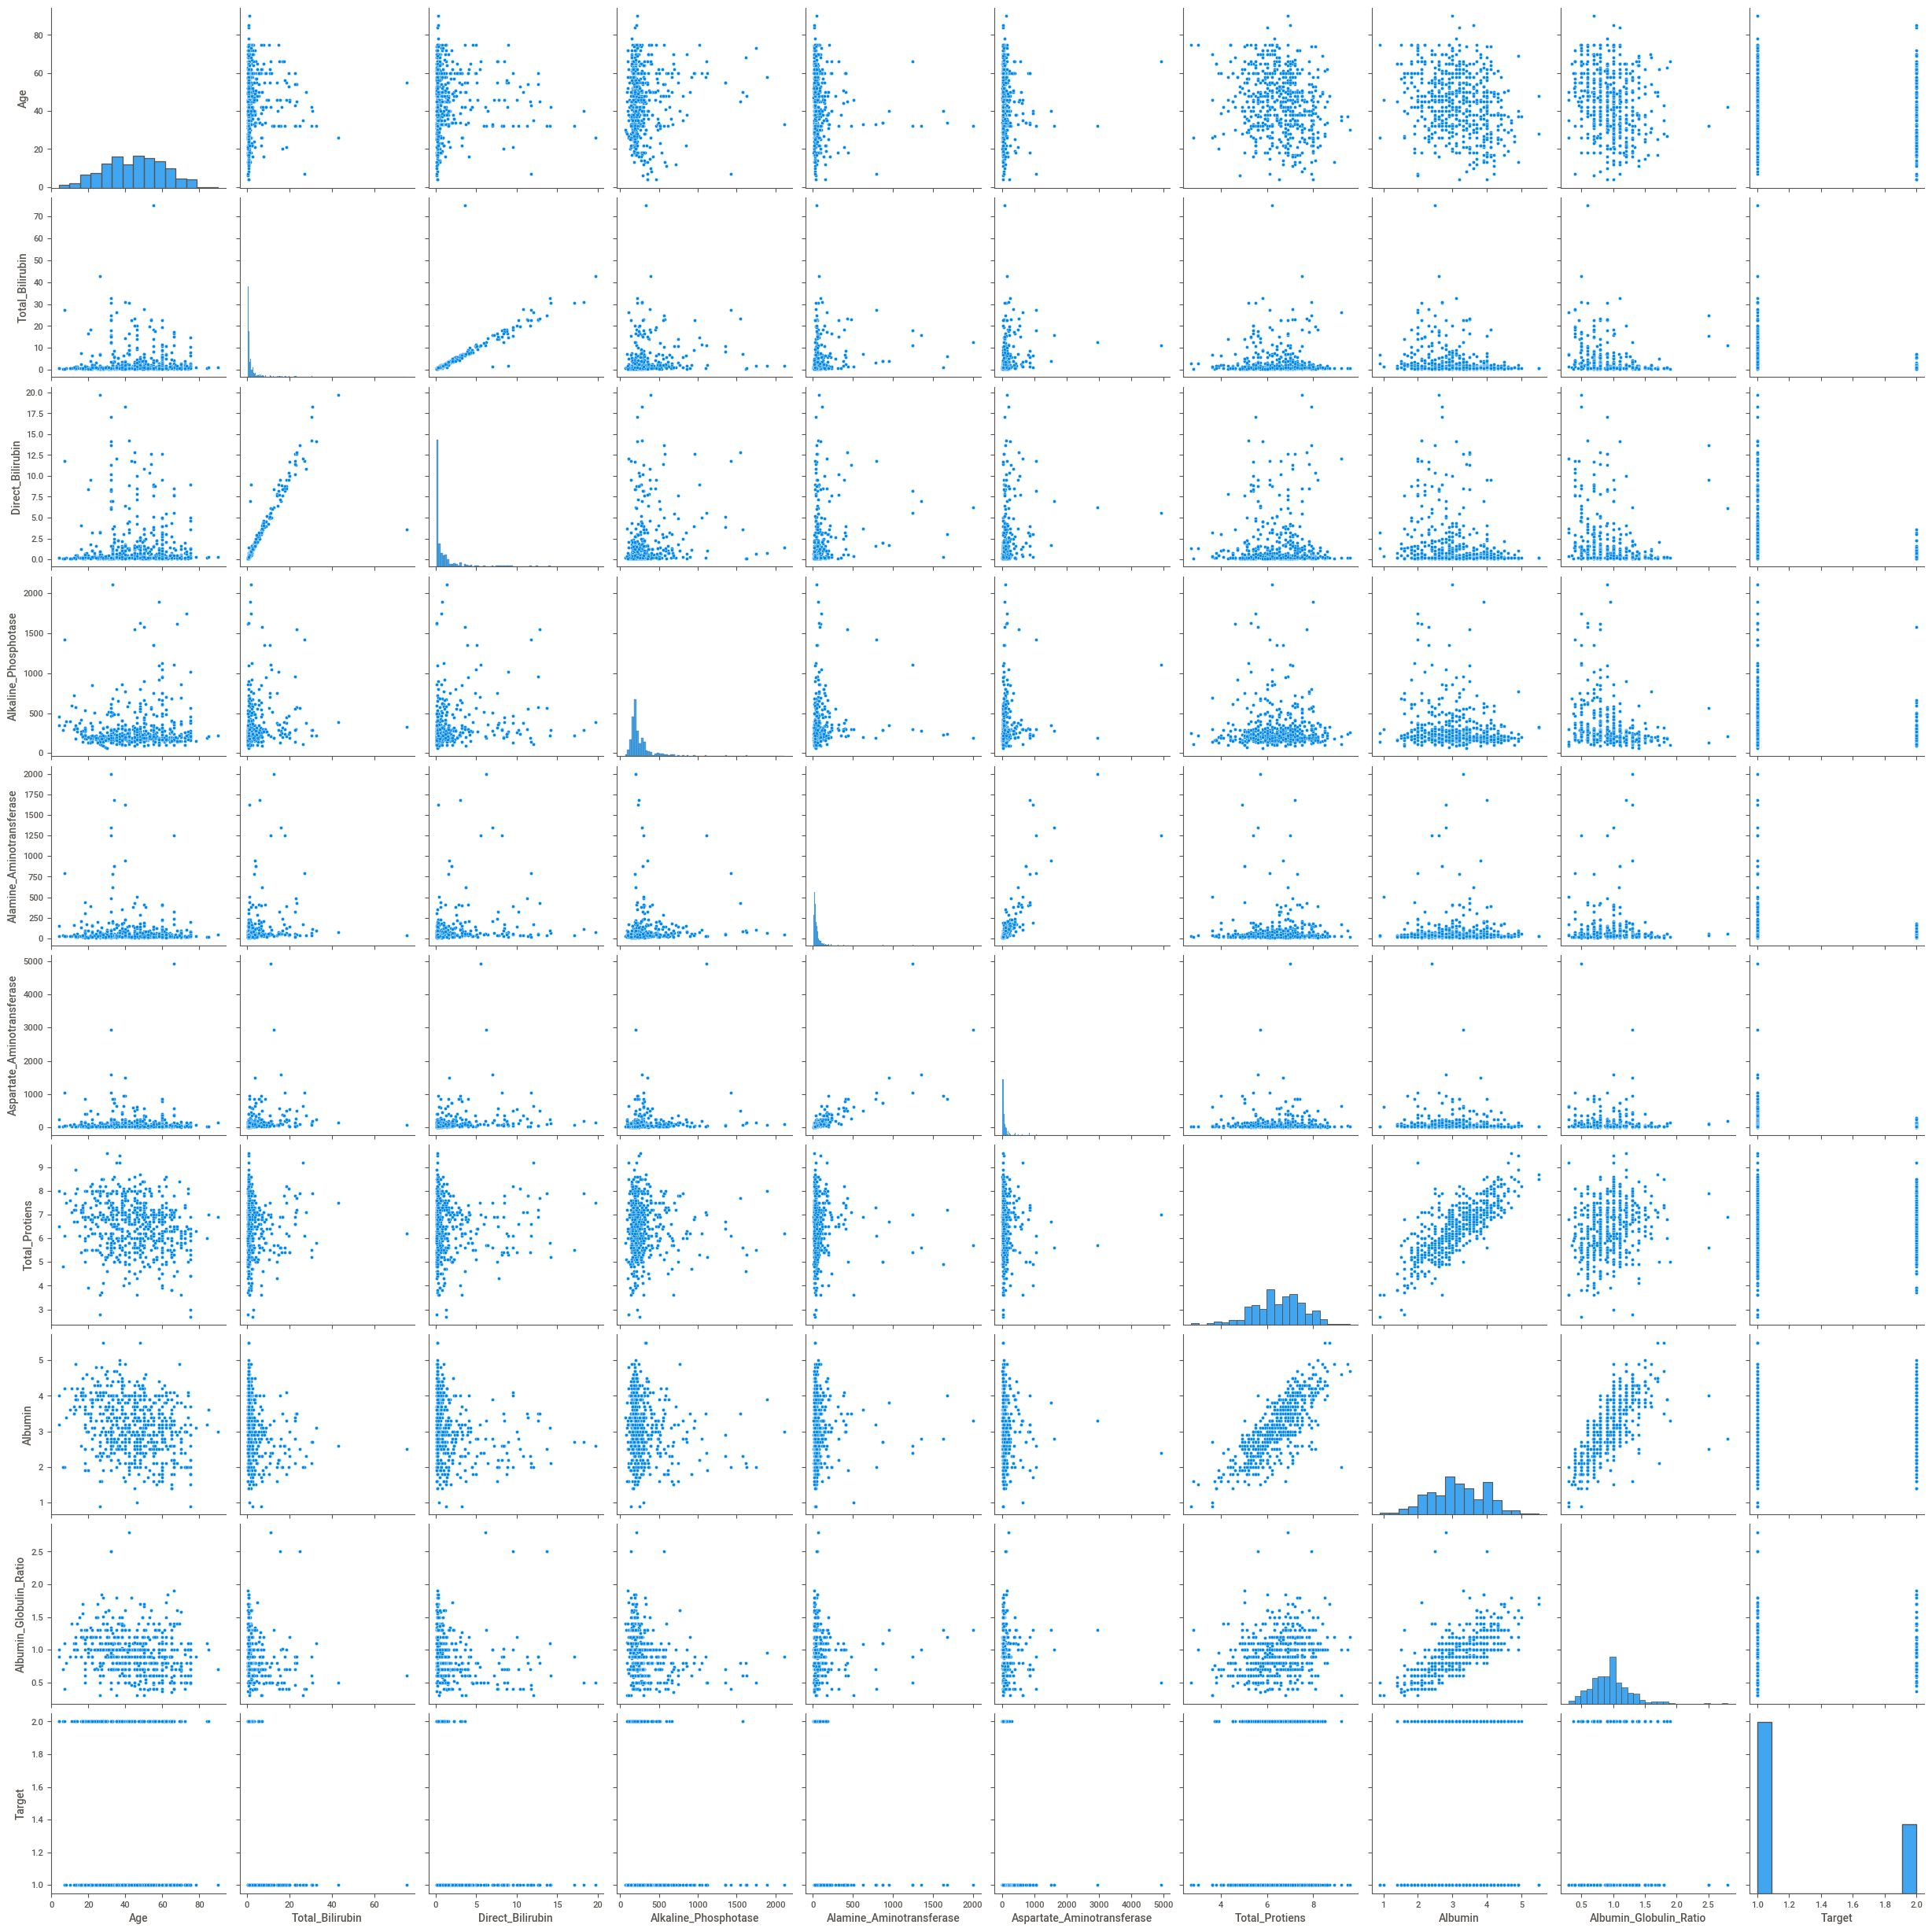

In [20]:
sns.pairplot(data)

## Data Preprocessing

In [21]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [22]:
data.loc[data.Albumin_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [23]:
# We can fill these values with the help of mean
data.loc[data.Albumin_Globulin_Ratio.isnull()==True,'Albumin_Globulin_Ratio']=data.Albumin_Globulin_Ratio.mean()
data.loc[data.Albumin_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target


## Checking for Outliers

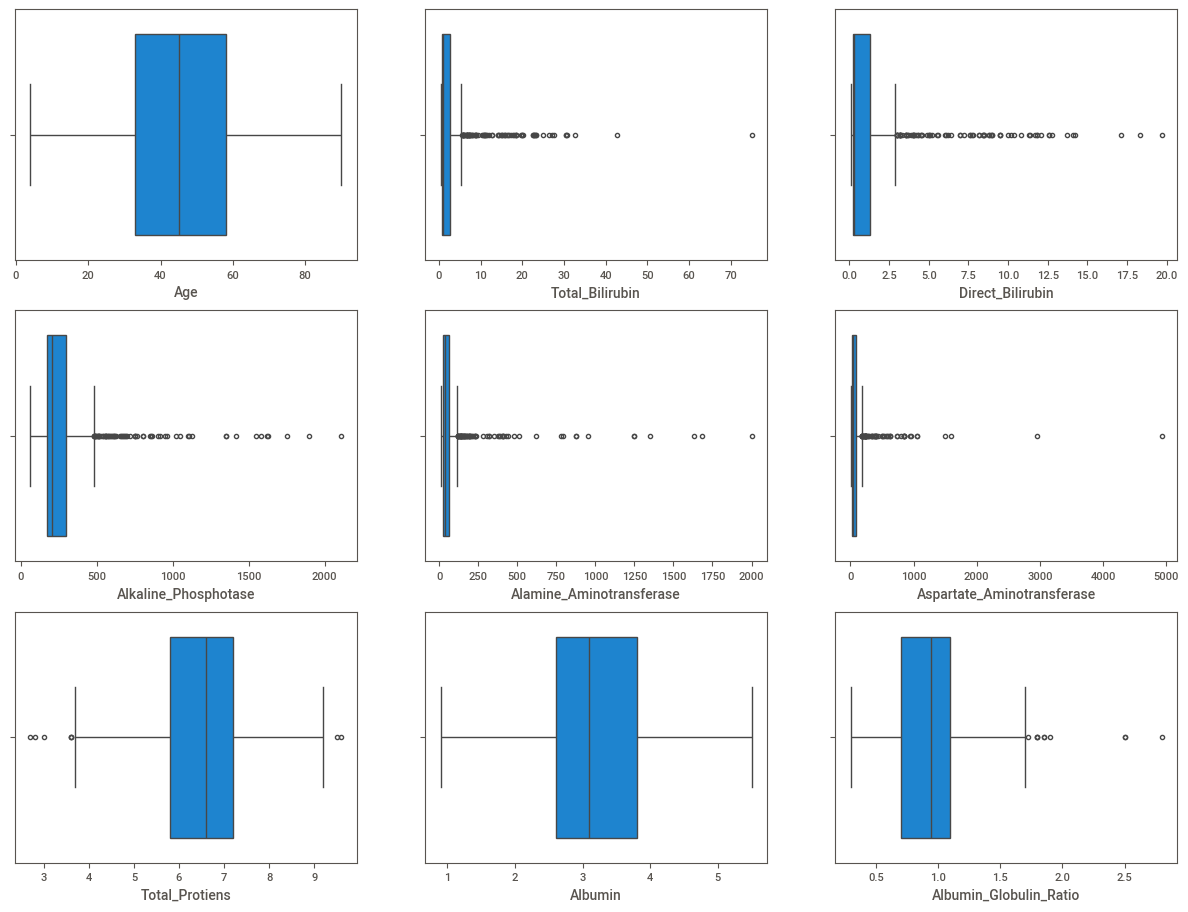

In [24]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in data.drop(labels=['Gender','Target'],axis=1):
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    plotnumber+=1

Insights-->
1.Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspar tate_Aminotransferase,Total_Protiens and Albumin_Globulin_Ratio contains outliers. So we trying to fill thise outliers with the help of mean and median depends on its skewness.

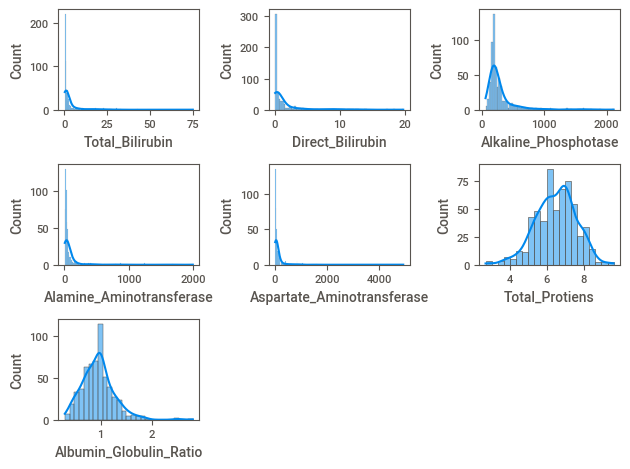

In [25]:
outliers=data[['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin_Globulin_Ratio']]
plotnumber=1
for i in outliers:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(outliers[i],kde=True)
    plotnumber+=1
plt.tight_layout()

Insights-->
1. From above graph you can say that graphs are heighly positivly skewed except last     two which are fairly normal.

In [26]:
q1=data.Total_Bilirubin.quantile(0.25)
q3=data.Total_Bilirubin.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

0.8
2.6
1.8


In [27]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

5.300000000000001
-1.9000000000000001


In [28]:
len(data.loc[data['Total_Bilirubin']>upper_limit])/len(data)*100

14.408233276157805

Above column has greater than 5% outliers heance we do not interfair it, since our data is important.

In [29]:
q1=data.Direct_Bilirubin.quantile(0.25)
q3=data.Direct_Bilirubin.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

0.2
1.3
1.1


In [30]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

2.95
-1.4500000000000002


In [31]:
print(len(data.loc[data['Direct_Bilirubin']>upper_limit])/len(data)*100)
print(len(data.loc[data['Direct_Bilirubin']<lower_limit])/len(data)*100)

13.893653516295027
0.0


Above column has greater than 5% outliers heance we do not interfair it, since our data is important.

In [32]:
q1=data.Alkaline_Phosphotase.quantile(0.25)
q3=data.Alkaline_Phosphotase.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

175.5
298.0
122.5


In [33]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

481.75
-8.25


In [34]:
len(data.loc[data['Alkaline_Phosphotase']>upper_limit])/len(data)*100

11.83533447684391

Above column has greater than 5% outliers heance we do not interfair it, since our data is important.

In [35]:
q1=data.Alamine_Aminotransferase.quantile(0.25)
q3=data.Alamine_Aminotransferase.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

23.0
60.5
37.5


In [36]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

116.75
-33.25


In [37]:
len(data.loc[data['Alamine_Aminotransferase']>upper_limit])/len(data)*100

12.521440823327614

Above column has greater than 5% outliers heance we do not interfair it, since our data is important.

In [38]:
q1=data.Aspartate_Aminotransferase.quantile(0.25)
q3=data.Aspartate_Aminotransferase.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

25.0
87.0
62.0


In [39]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

180.0
-68.0


In [40]:
len(data.loc[data['Aspartate_Aminotransferase']>upper_limit])/len(data)*100

11.320754716981133

Above column has greater than 5% outliers heance we do not interfair it, since our data is important.

In [41]:
q1=data.Total_Protiens.quantile(0.25)
q3=data.Total_Protiens.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

5.8
7.2
1.4000000000000004


In [42]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

9.3
3.6999999999999993


In [43]:
print(len(data.loc[data['Total_Protiens']>upper_limit])/len(data)*100)
print(len(data.loc[data['Total_Protiens']<lower_limit])/len(data)*100)

0.34305317324185247
1.0291595197255576


In [44]:
data.loc[data['Total_Protiens']>upper_limit,'Total_Protiens']=data.Total_Protiens.median()
data.loc[data['Total_Protiens']<lower_limit,'Total_Protiens']=data.Total_Protiens.median()

In [45]:
data.Albumin_Globulin_Ratio.skew()

0.9957034104499916

In [46]:
q1=data.Albumin_Globulin_Ratio.quantile(0.25)
q3=data.Albumin_Globulin_Ratio.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

0.7
1.1
0.40000000000000013


In [47]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

1.7000000000000002
0.09999999999999976


In [48]:
print(len(data.loc[data['Albumin_Globulin_Ratio']>upper_limit])/len(data)*100)
print(len(data.loc[data['Albumin_Globulin_Ratio']<lower_limit])/len(data)*100)

1.7152658662092626
0.0


In [49]:
data.loc[data.Albumin_Globulin_Ratio>upper_limit,'Albumin_Globulin_Ratio']=data.Albumin_Globulin_Ratio.median()

## Label Encoding

In [50]:
# The target values are in 1 and 2 which may get error in next model so we convert 
# 2 in 0
data.loc[data['Target']==2,'Target']=0

In [51]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [52]:
data.Gender=lb.fit_transform(data.Gender)

In [53]:
# scaling the data
# we have skewed data hance we use min max scaler
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
data[['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_Globulin_Ratio']]=mn.fit_transform(data[['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_Globulin_Ratio']])

In [54]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,0,0.004021,0.1,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,1
1,62,1,0.140751,5.5,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1
2,62,1,0.092493,4.1,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1
3,58,1,0.008043,0.4,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1
4,72,1,0.046917,2.0,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1


## Feture Selaction

<Axes: >

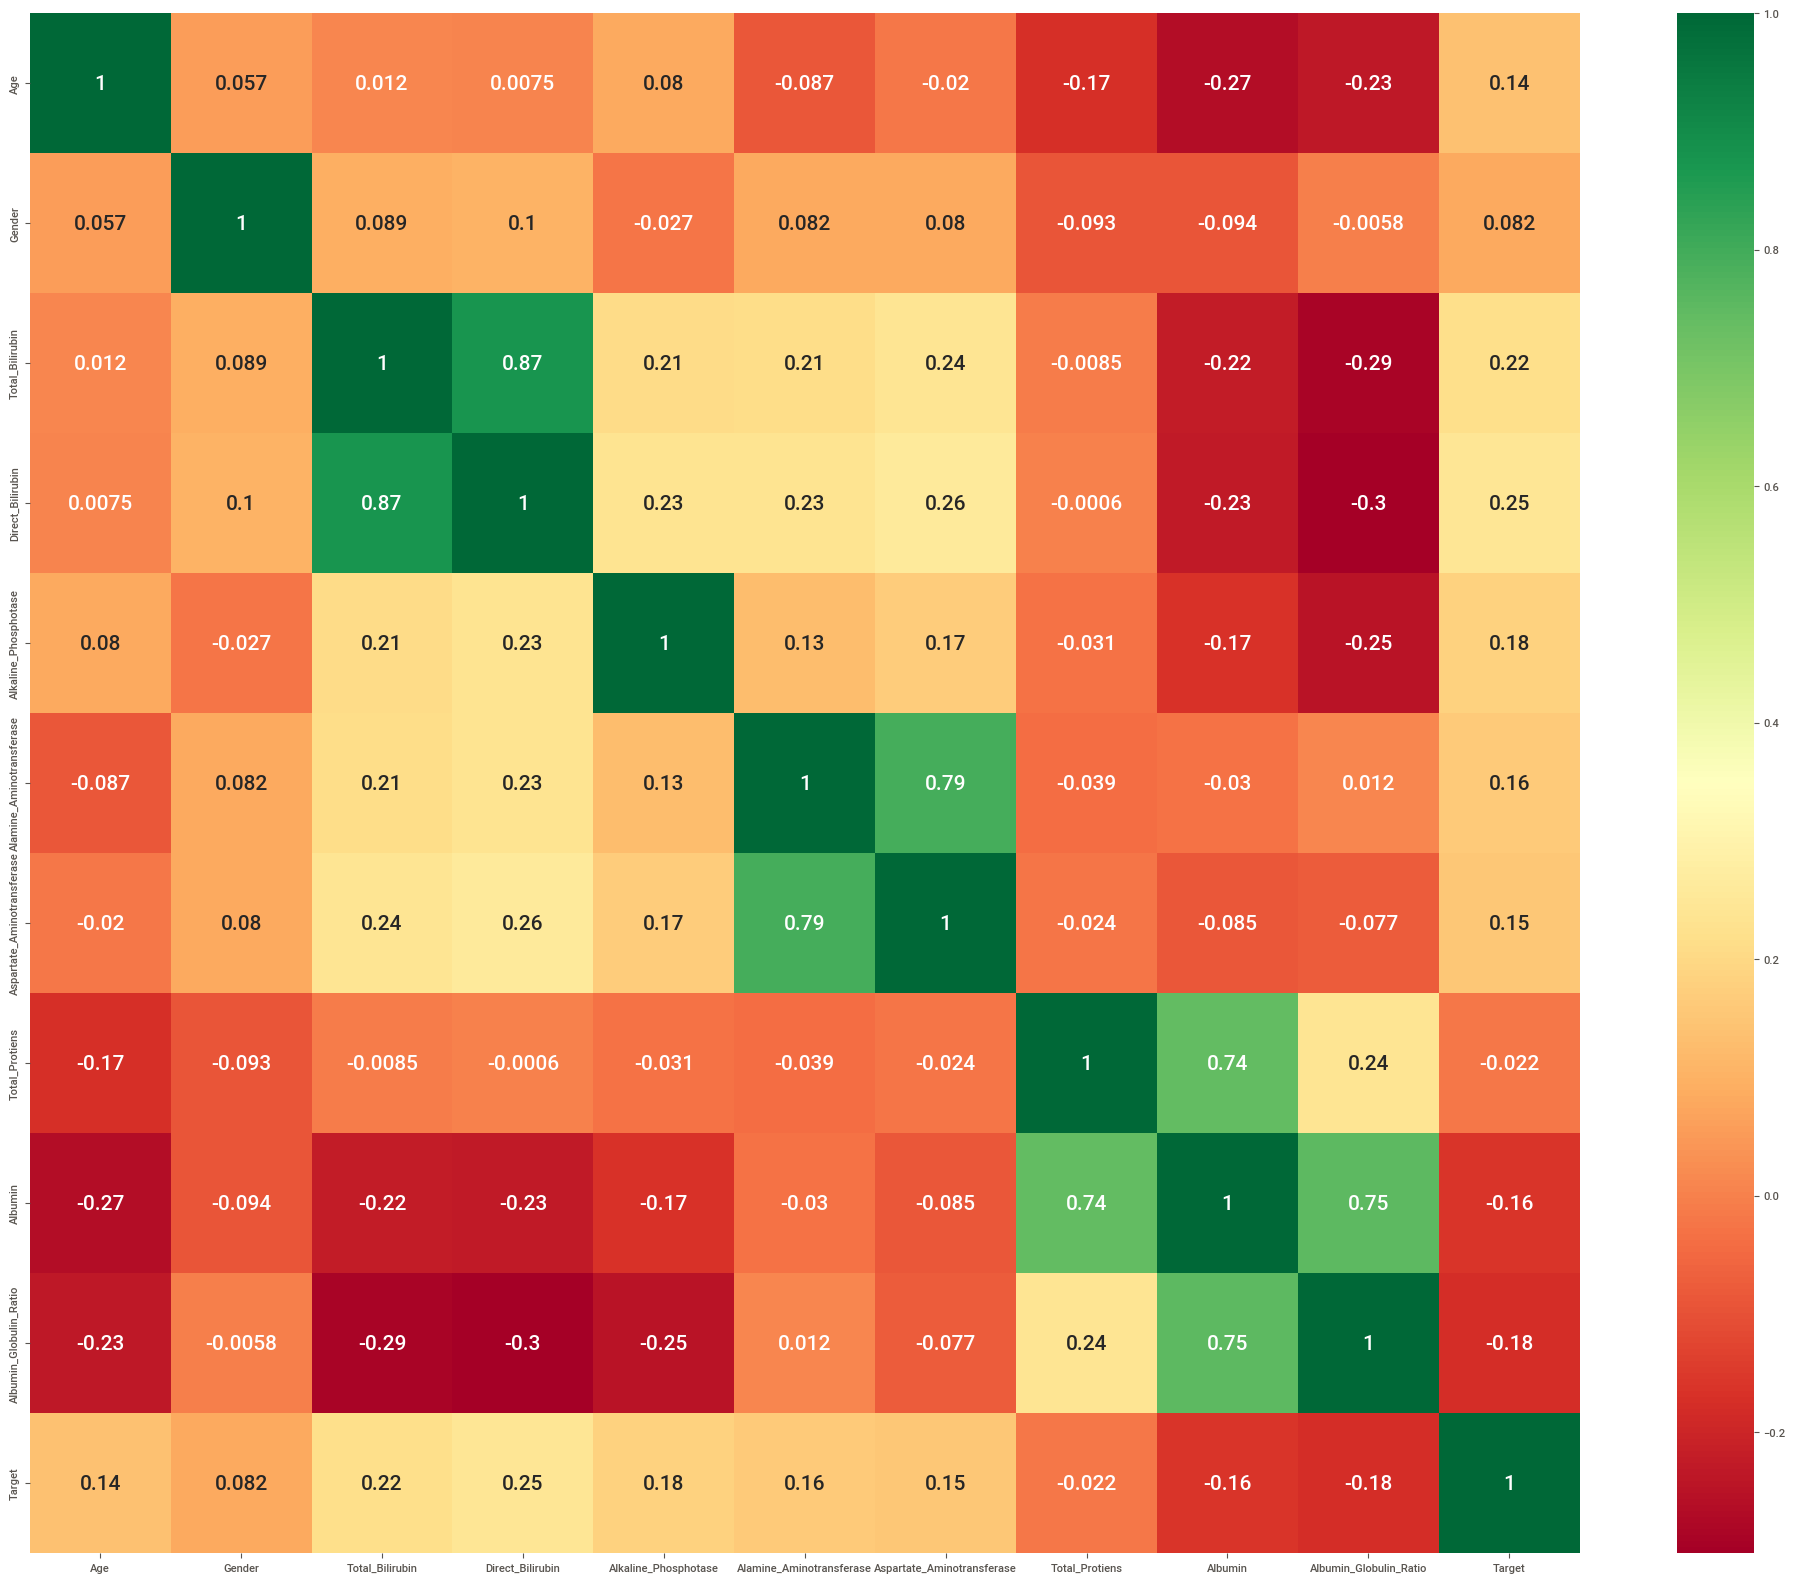

In [55]:
# heatmap
plt.figure(figsize=(25,20),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':15})

In [56]:
# from my obs. Direct_bilirubin is heigly correlated so I delete this column
data.drop('Direct_Bilirubin',axis=1,inplace=True)

## Model Selection

In [57]:
# split the data in x and y format.
x=data.drop('Target',axis=1)
y=data.Target

In [58]:
print(x.shape)
print(y.shape)

(583, 9)
(583,)


In [66]:
# splitting of data in train and test format
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.20)

In [67]:
print(X_train.shape)
print(X_test.shape)

(466, 9)
(117, 9)


In [68]:
data.Target.value_counts()

Target
1    416
0    167
Name: count, dtype: int64

In [69]:
# balancing the data

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=34)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [72]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

In [ ]:
# step 3:-

In [ ]:
# import the model

# evaluation of model:-

# Logistic Regression

In [73]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix



# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)
y_predlog = LR.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_predlog)
f1 = f1_score(y_test, y_predlog, average='weighted')
recall = recall_score(y_test, y_predlog, average='weighted')
cls_report = classification_report(y_test, y_predlog)
conf_matrix = confusion_matrix(y_test, y_predlog)

print("Model: Logistic Regression")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Logistic Regression
Accuracy: 0.6752136752136753
F1 Score: 0.6940863940863942
Recall: 0.6752136752136753
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        29
           1       0.85      0.69      0.76        88

    accuracy                           0.68       117
   macro avg       0.62      0.66      0.62       117
weighted avg       0.74      0.68      0.69       117

Confusion Matrix:
[[18 11]
 [27 61]]
--------------------------------------------------


# Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC

# SVM
SVM = SVC()
SVM.fit(X_train_res, y_train_res)
y_pred_svm = SVM.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
cls_report = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Model: SVM")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: SVM
Accuracy: 0.6838
F1 Score: 0.6965
Recall: 0.6838
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.52      0.45        29
           1       0.82      0.74      0.78        88

    accuracy                           0.68       117
   macro avg       0.61      0.63      0.61       117
weighted avg       0.72      0.68      0.70       117

Confusion Matrix:
[[15 14]
 [23 65]]
--------------------------------------------------


# K-Nearest Neighbors (KNN)¶

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train_res, y_train_res)
y_pred_knn = KNN.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
cls_report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Model: KNN")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: KNN
Accuracy: 0.6752
F1 Score: 0.6960
Recall: 0.6752
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.69      0.51        29
           1       0.87      0.67      0.76        88

    accuracy                           0.68       117
   macro avg       0.64      0.68      0.63       117
weighted avg       0.75      0.68      0.70       117

Confusion Matrix:
[[20  9]
 [29 59]]
--------------------------------------------------


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train_res, y_train_res)
y_pred_rf = RF.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
cls_report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Model: Random Forest")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Random Forest
Accuracy: 0.717948717948718
F1 Score: 0.7292922765261669
Recall: 0.717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        29
           1       0.85      0.76      0.80        88

    accuracy                           0.72       117
   macro avg       0.65      0.67      0.65       117
weighted avg       0.75      0.72      0.73       117

Confusion Matrix:
[[17 12]
 [21 67]]
--------------------------------------------------


In [78]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.81063123 0.77443609 0.81290323]
Cross validation Score: 0.7993235150892986
Std : 0.017622493757793473


In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Initialize the model
rf_model = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,  # Parameter distribution to sample from
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Verbose level
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_res, y_train_res)

# Best parameters found
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best Accuracy: 0.7972819801064075


# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train_res, y_train_res)
y_pred_dt = DT.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
cls_report = classification_report(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("Model: Decision Tree")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Decision Tree
Accuracy: 0.5726495726495726
F1 Score: 0.5989141142372321
Recall: 0.5726495726495726
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.45      0.34        29
           1       0.77      0.61      0.68        88

    accuracy                           0.57       117
   macro avg       0.52      0.53      0.51       117
weighted avg       0.65      0.57      0.60       117

Confusion Matrix:
[[13 16]
 [34 54]]
--------------------------------------------------


In [81]:
from sklearn.model_selection import RandomizedSearchCV
param_distribution={'criterion':('gini','entropy'),
                    'splitter':('best','random'),
                    'max_depth':[1,3,5,13,16,18,15,6,9,7,19],
                    'min_samples_leaf':[34,12,10,1,2,4,6,7,18,16,15,13],
                    'min_samples_split':[2,3,4]}

In [82]:
dt1=DecisionTreeClassifier(random_state=3)
random_dt=RandomizedSearchCV(estimator=dt1,
                             param_distributions=param_distribution,
                             scoring='accuracy',
                             n_jobs=-1,verbose=2,
                             cv=3,n_iter=100)

In [83]:
random_dt.fit(X_train_res, y_train_res)
random_dt.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'splitter': 'random',
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 13,
 'criterion': 'gini'}

In [84]:
dt2=DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=3,min_samples_leaf=2,max_depth=9)
dt2.fit(X_train_res, y_train_res)
y_pred_dt2=dt2.predict(X_test)
print(accuracy_score(y_test,y_pred_dt2))
print(f1_score(y_test,y_pred_dt2))
print(classification_report(y_test,y_pred_dt2))

0.5641025641025641
0.653061224489796
              precision    recall  f1-score   support

           0       0.31      0.62      0.41        29
           1       0.81      0.55      0.65        88

    accuracy                           0.56       117
   macro avg       0.56      0.58      0.53       117
weighted avg       0.69      0.56      0.59       117



In [85]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5726


# XGBOOST

In [86]:
from xgboost import XGBClassifier

# XGBoost
XGB = XGBClassifier()
XGB.fit(X_train_res, y_train_res)
y_pred_xgb = XGB.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
cls_report = classification_report(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("Model: XGBoost")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: XGBoost
Accuracy: 0.717948717948718
F1 Score: 0.7272947959338493
Recall: 0.717948717948718
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.55      0.49        29
           1       0.84      0.77      0.80        88

    accuracy                           0.72       117
   macro avg       0.64      0.66      0.65       117
weighted avg       0.74      0.72      0.73       117

Confusion Matrix:
[[16 13]
 [20 68]]
--------------------------------------------------


# Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
GB = GradientBoostingClassifier()
GB.fit(X_train_res, y_train_res)
y_pred_gb = GB.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb, average='weighted')
recall = recall_score(y_test, y_pred_gb, average='weighted')
cls_report = classification_report(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

print("Model: Gradient Boosting")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Gradient Boosting
Accuracy: 0.6837606837606838
F1 Score: 0.7026952642046982
Recall: 0.6837606837606838
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.66      0.51        29
           1       0.86      0.69      0.77        88

    accuracy                           0.68       117
   macro avg       0.64      0.67      0.64       117
weighted avg       0.75      0.68      0.70       117

Confusion Matrix:
[[19 10]
 [27 61]]
--------------------------------------------------


# Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)
y_pred = gnb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cls_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model: Naive Bayes")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: Naive Bayes
Accuracy: 0.5128205128205128
F1 Score: 0.5274090802164196
Recall: 0.5128205128205128
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.90      0.48        29
           1       0.92      0.39      0.54        88

    accuracy                           0.51       117
   macro avg       0.62      0.64      0.51       117
weighted avg       0.77      0.51      0.53       117

Confusion Matrix:
[[26  3]
 [54 34]]
--------------------------------------------------


# CatBoost

In [89]:
from catboost import CatBoostClassifier

# CatBoost
ct = CatBoostClassifier(learning_rate=0.1, iterations=500, depth=10, verbose=False)
ct.fit(X_train_res, y_train_res)
y_pred = ct.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cls_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model: CatBoost")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print("Classification Report:")
print(cls_report)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)


Model: CatBoost
Accuracy: 0.7008547008547008
F1 Score: 0.7128857478307832
Recall: 0.7008547008547008
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.55      0.48        29
           1       0.84      0.75      0.79        88

    accuracy                           0.70       117
   macro avg       0.63      0.65      0.63       117
weighted avg       0.73      0.70      0.71       117

Confusion Matrix:
[[16 13]
 [22 66]]
--------------------------------------------------


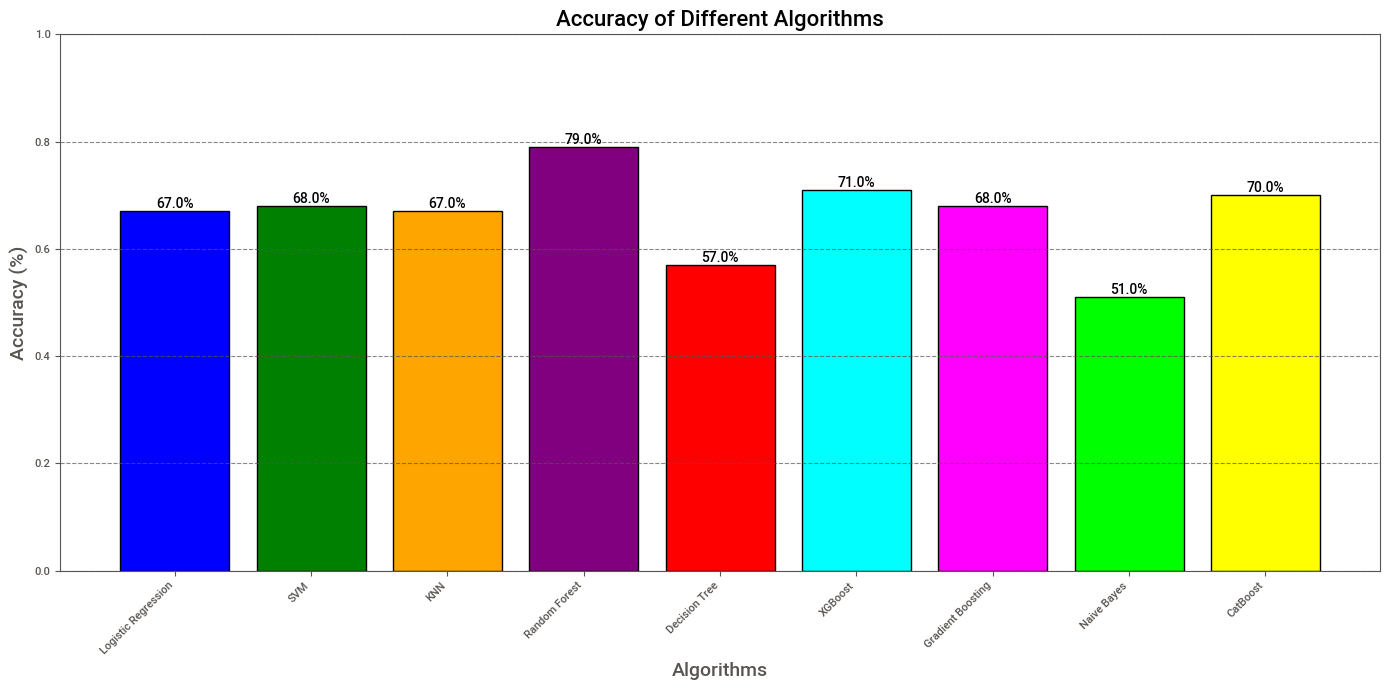

In [90]:
import matplotlib.pyplot as plt
import numpy as np


algorithms = [
    "Logistic Regression", "SVM", "KNN", 
    "Random Forest", "Decision Tree", 
    "XGBoost", "Gradient Boosting", 
     "Naive Bayes",  "CatBoost"
]
accuracies = [0.67, 0.68, 0.67, 0.79, 0.57, 0.71, 0.68, 0.51, 0.70]


colors = [
    'blue', 'green', 'orange', 'purple', 
    'red', 'cyan', 'magenta', 'lime', 
    'yellow'



    
]

plt.figure(figsize=(14, 7))
bars = plt.bar(algorithms, accuracies, color=colors, edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{acc*100:.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Accuracy of Different Algorithms", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1) 

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


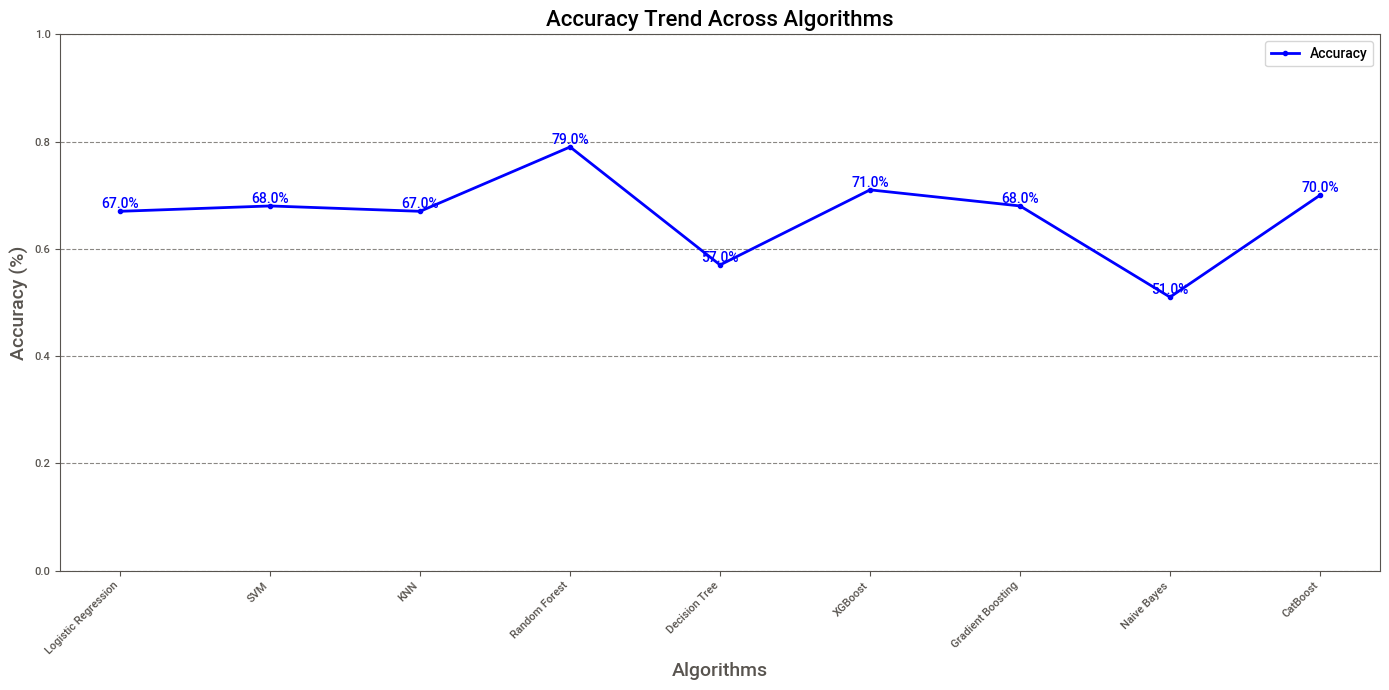

In [91]:

plt.figure(figsize=(14, 7))
plt.plot(algorithms, accuracies, marker='o', color='b', label="Accuracy", linestyle='-', linewidth=2)


for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc*100:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')


plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Accuracy Trend Across Algorithms", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()
plt.tight_layout()
plt.show()


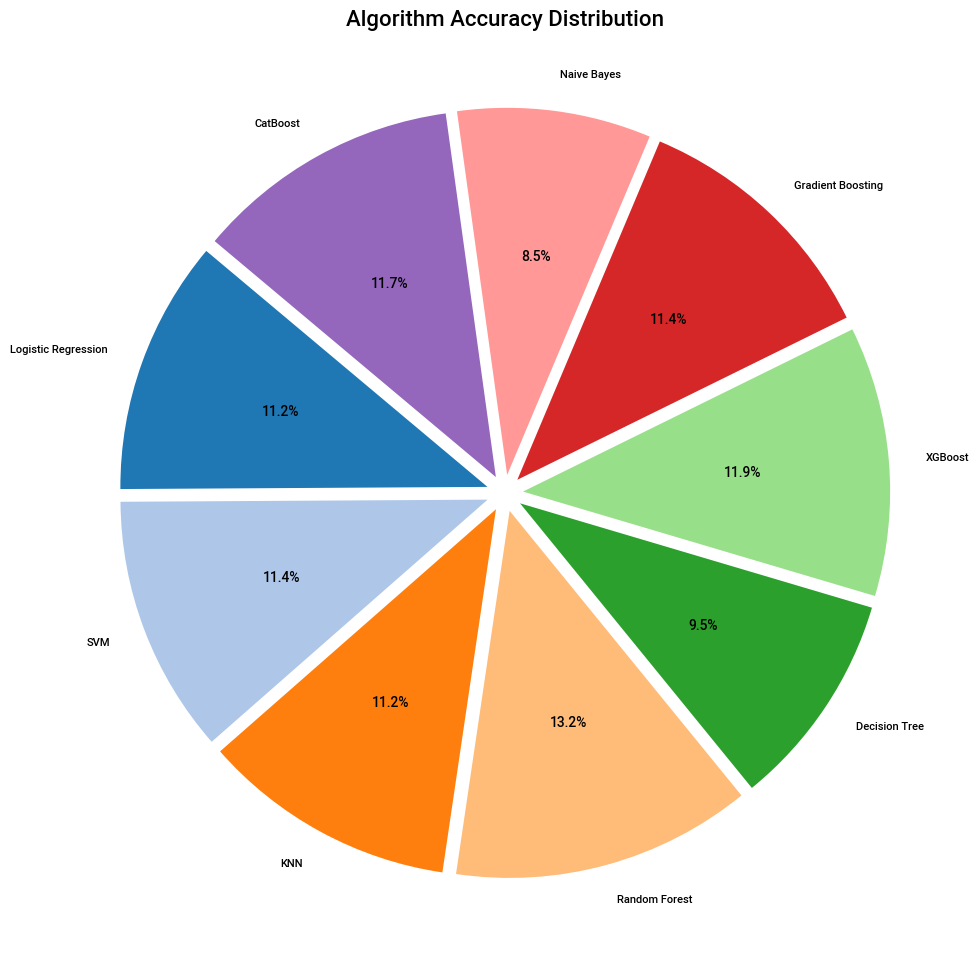

In [93]:
import matplotlib.pyplot as plt

algorithms = [
    "Logistic Regression", "SVM", "KNN", 
    "Random Forest", "Decision Tree", 
    "XGBoost", "Gradient Boosting", 
     "Naive Bayes",  "CatBoost"
]
accuracies = [0.67, 0.68, 0.67, 0.79, 0.57, 0.71, 0.68, 0.51, 0.70]




plt.figure(figsize=(10, 10))
explode = [0.05] * len(algorithms)  
plt.pie(
    accuracies, labels=algorithms, autopct='%1.1f%%', 
    startangle=140, explode=explode, colors=plt.cm.tab20.colors
)


plt.title("Algorithm Accuracy Distribution", fontsize=16)


plt.tight_layout()
plt.show()


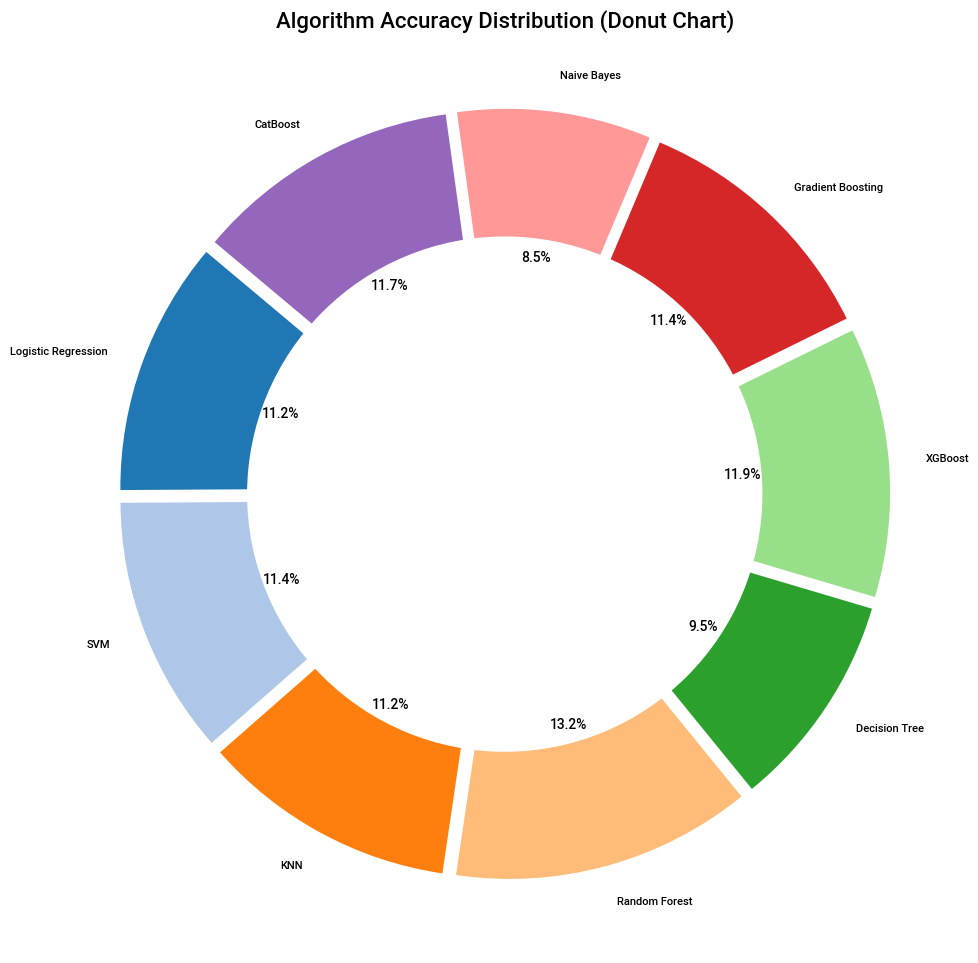

In [94]:
plt.figure(figsize=(10, 10))
explode = [0.05] * len(algorithms)

# Donut Chart
wedges, texts, autotexts = plt.pie(
    accuracies, labels=algorithms, autopct='%1.1f%%', 
    startangle=140, explode=explode, colors=plt.cm.tab20.colors
)
# Inner white circle for donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

plt.title("Algorithm Accuracy Distribution (Donut Chart)", fontsize=16)
plt.tight_layout()
plt.show()
